# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha \left( \frac{2}{n} X^{T}(Xw - y) + \frac{2}{C}w_{old} \right) $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Решение***

$L(w) = \frac{1}{N}\left[\sum_i (y_i - x_iw) ^ 2 \right]$

Найдем градиент:

$\nabla_{w}L(w) = \frac{2}{N}\left[\sum_i (x_iw - y_i)x_i \right]$

Если проанализировать эту формулу, то можно увидеть, что ее можно представить в более компактном виде через матричные произведения

$\nabla_{w}L(w) = \frac{2}{n} X^{T}(Xw - y)$

Теперь найдем слагаемое от L2 регуляризации:

$\nabla_{w}R(w) = \frac{2}{C}w$

Сгруппируем все вместе:

$\nabla_{w}L(w) = \frac{2}{n} X^{T}(Xw - y) + \frac{2}{C}w$

Выпишем формулу для обновления весов:

$ w_{new} = w_{old} - \alpha \left( \frac{2}{n} X^{T}(Xw - y) + \frac{2}{C}w_{old} \right) $

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha \left( \frac{1}{n} X^{T}(a - y) + \frac{2}{C}w_{old} \right) $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Решение***

$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$

С градиентом от слагаемого, отвечающего за регуляризацию, все так же, как в линейной регрессии:

$\nabla_{w}R(w) = \frac{2}{C}w$

Теперь расмотрим первое слагаемое:

$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right]$

Для удобства заранее вычислим $\nabla_{w}a_i(<x_i, w>)$:

$e^{-<x_i, w>}$

$\displaystyle \nabla_{w}a_i(<x_i, w>) = \frac{e^{-<x_i, w>}x_i}{(1 + e^{-<x_i, w>})^2}$

Также заранее вычислим $1 - a_i$:

$\displaystyle 1 - a_i = \frac{e^{-<x_i, w>}}{1 + e^{-<x_i, w>}}$

Обозначим $e^{-<x_i, w>}$ просто за $E$. Исключительно из соображений компактности вывода итоговой формулы

Теперь можно начать расписывать $\nabla_{w}L(w)$:

$\displaystyle \nabla_{w}L(w) = - \frac{1}{N}\left[\sum_i  y_i \frac{1}{a_i}\nabla_{w}a_i(<x_i, w>) - (1 - y_i)\frac{1}{1 - a_i} \nabla_{w}a_i(<x_i, w>)  \right] = $

$\displaystyle = - \frac{1}{N}\left[\sum_i  y_i (1 + E) \frac{Ex_i}{(1 + E)^2} - \frac{1 + E}{E} \frac{Ex_i}{(1 + E)^2} +  y_i \frac{1 + E}{E} \frac{Ex_i}{(1 + E)^2} \right] = $

$\displaystyle = - \frac{1}{N}\left[\sum_i y_i \frac{Ex_i}{(1 + E)^2} - \frac{x_i}{1 + E} + y_i \frac{x_i}{1 + E} \right] = $

$\displaystyle = - \frac{1}{N}\left[\sum_i  y_i x_i \left( \frac{E}{1 + E} + \frac{1}{1 + E}  \right) - \frac{x_i}{1 + E}  \right] = $

$\displaystyle = - \frac{1}{N}\left[\sum_i  y_i x_i - x_i a_i  \right] = $

$\displaystyle = - \frac{1}{N}\left[\sum_i  (y_i - a_i) x_i    \right] = \frac{1}{N}\left[\sum_i  (a_i - y_i) x_i    \right]$

Аналогично линейной регрессии здесь можно избавиться от знака суммы и перейти к матричным умножениям

Тогда наш градиент будет выглядеть следующим образом:

$\displaystyle \nabla_{w}L(w) = \frac{1}{n} X^{T}(a - y)$

Вместе со слагаемым, отвечающим за регуляризацию:

$\displaystyle \nabla_{w}L(w) = \frac{1}{n} X^{T}(a - y) + \frac{2}{C}w$

Выпишем формулу для обновления весов:

$\displaystyle w_{new} = w_{old} - \alpha \left( \frac{1}{n} X^{T}(a - y) + \frac{2}{C}w_{old} \right) $

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Решение***

   1) Как мы уже выяснили (опустим $\frac{1}{2N}$): $$\nabla_{w}Q(w) = X^{T}Xw - X^{T}y$$

Выпишем матрицу Гессе: $$H(Q) = X^{T}X$$

Легко заметить, что $$H[i, j] = <x_{i}, x_{j}>,$$
где $x_{k}$ - столбец матрицы $X, k = 1...D$

То есть мы получили матрицу Грама, а она является положительно определенной для любой линейно независимой системы векторов

То есть точное решение линейной регрессии действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг

   2) Точное решение для модели с  𝐿2  регуляризацией:
   $$Q(w)=\frac{1}{2N}\|Xw - y\|^{2} + \lambda\|w\|^{2}$$
   
   $$\nabla_{w}Q(w)=\frac{1}{N}(X^{T}Xw - X^{T}y) + \lambda Ew=0$$
   
   Домножим на $N$ и положим, что $\lambda=N\lambda.$ Тогда:
   
   $$(X^{T}X + \lambda E)w=X^{T}y$$
   
   $$w=(X^{T}X+\lambda E)^{-1}X^{T}y$$
   
   Пусть $X$ имеет линейно зависимые признаки. Тогда к вырожденной матрице $X^{T}X$ мы добавляем диагональную матрицу и гарантированно получаем невырожденную матрицу, имеющую обратную. 

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Решение***

Рассмотрим производную от $E(L | x_i)$ по $a(x_i)$:
$$\frac{\delta E(L | x_i)}{\delta a(x_i)} = \frac{-p(y_i = 1 | x_i)}{a(x_i)} + \frac{p(y_i = 0 | x_i)}{1-a(x_i)} $$
$$\frac{\delta E(L | x_i)}{\delta a(x_i)} = 0 	\implies -p(y_i = 1 | x_i) + p(y_i = 1 | x_i)a(x_i) + a(x_i) -p(y_i = 1 | x_i)a(x_i)$$
$$a(x_i) = p(y_i = 1 | x_i)$$
Остается убедиться, что вторая производная по $a(x_i) > 0$
$$ \frac{\delta^{2} E(L | x_i)}{\delta a^{2}(x_i)} = \frac{p(y_i = 1 | x_i)}{a^{2}(x_i)} + \frac{p(y_i = 0 | x_i)}{(1-a(x_i))^{2}}$$
Что и требовалось доказать

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Решение***

Мы вводим регуляризацию для уменьшения весов, поскольку, например, случай, когда есть два похожих объекта, немного отличающихся только в одной компоненте, при больших весах вызовет большое различие на выходе модели. В случае веса $w_0$ все компоненты выборки, отвечающие этому весу у нас равны 1. 
Вывод: Не все параметры надо регуляризировать. Коэффициент при свободном члене не нужно регуляризировать.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        index = np.arange(X.shape[0])
        np.random.shuffle(index)        
        X = X[index]
        y = y[index]

    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i : i + batch_size, :]
        y_batch = y[i : i + batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [7]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss = self.predict(X_batch).ravel() - y_batch
            loss = (loss @ loss)/X_batch.shape[0]
        else:
            a = self.predict(X_batch).ravel()
            loss = y_batch @ np.log(a)
            loss += (1 - y_batch) @ np.log(1 - a)
            loss = -loss/X_batch.shape[0]        
        loss += (self.weights[1:].ravel() @ self.weights[1:].ravel())/self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            discrepancy = self.predict(X_batch) - y_batch.reshape(-1, 1)
            loss_grad = (2*(X_batch.T @ discrepancy)/X_batch.shape[0]).reshape(-1, 1)
        else:
            discrepancy = self.predict(X_batch) - y_batch.reshape(-1, 1)
            loss_grad = ((X_batch.T @ discrepancy)/X_batch.shape[0]).reshape(-1, 1)
        reg_grad = 2 * self.weights / self.C
        reg_grad[0, 0] = 0
        loss_grad += reg_grad
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha*new_grad
        
    
    def fit(self, X, y, batch_size=1):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        X = np.hstack((np.ones(X.shape[0]).reshape(-1, 1), X))
        self.weights = np.random.normal(0, 1, size=(X.shape[1], 1))
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if X.shape[1] != self.weights.shape[0]:
            X = np.hstack((np.ones(X.shape[0]).reshape(-1, 1), X))
        
        if self.model_type == 'lin_reg':
            y_hat = X @ self.weights
        else:
            y_hat = sigmoid(X @ self.weights)
        
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf):
    x = np.linspace(-3, 3, 2)
    w = clf.weights
    y = -w[1]/w[2]*x
    plt.plot(x, y, label=clf.model_type)
    plt.legend()

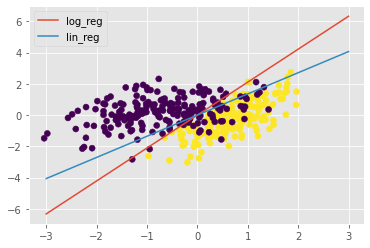

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

X = (X - X.mean(axis=0))/X.std(axis=0)

my_log_reg = MySGDClassifier(batch_generator=batch_generator, C=100, model_type='log_reg')
my_log_reg.fit(X, y)
plot_decision_boundary(my_log_reg)

my_lin_reg = MySGDClassifier(batch_generator=batch_generator, C=100, model_type='lin_reg')
my_lin_reg.fit(X, y)
plot_decision_boundary(my_lin_reg)

plt.scatter(X[:,0], X[:,1], c=y);

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [12]:
X.shape

(100000, 10)

CPU times: user 5.17 s, sys: 49.6 ms, total: 5.22 s
Wall time: 5.21 s


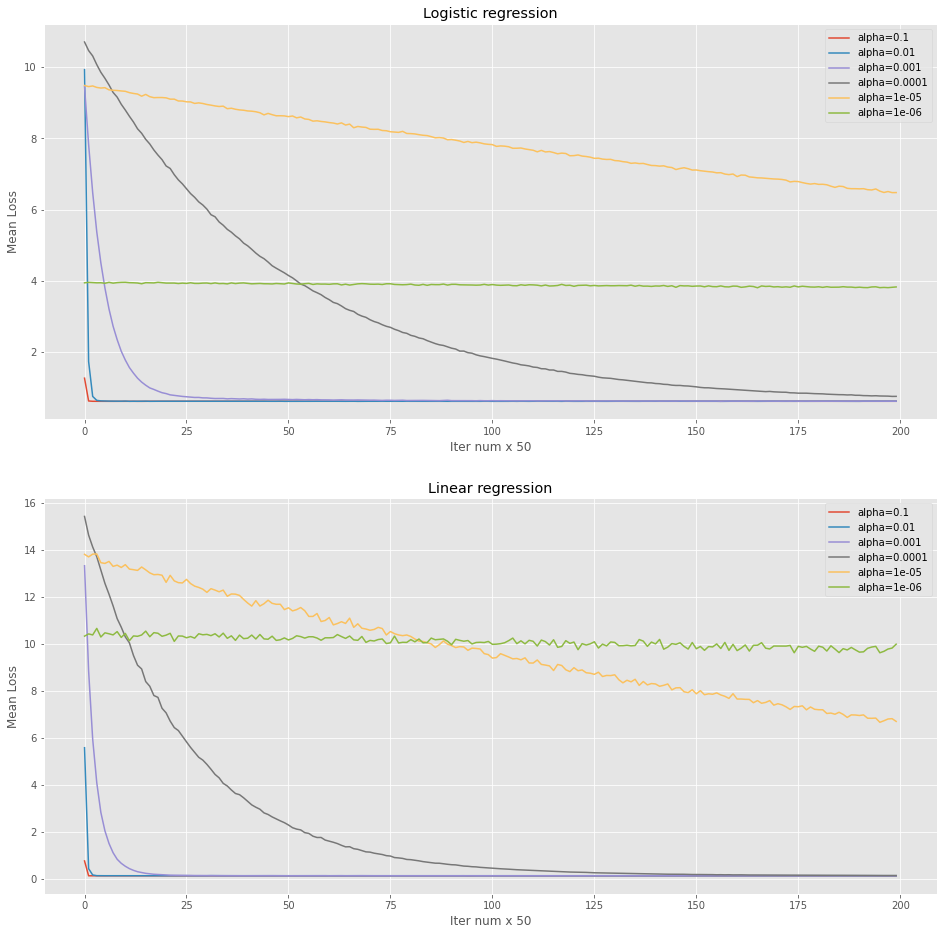

In [13]:
%%time
X = (X - X.mean(axis=0))/X.std(axis=0)
alphas = np.logspace(-1, -6, num=6)
N = 50

fig = plt.figure(figsize=(16, 16))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
ax1.set_title('Logistic regression')
ax1.set_xlabel('Iter num x '+str(N))
ax1.set_ylabel('Mean Loss')
ax2.set_title('Linear regression')
ax2.set_xlabel('Iter num x '+str(N))
ax2.set_ylabel('Mean Loss')
params = {'batch_generator' : batch_generator}
for alpha in alphas:
    my_log_reg = MySGDClassifier(model_type='log_reg', alpha=alpha, **params)
    my_log_reg.fit(X, y, 100)
    my_lin_reg = MySGDClassifier(model_type='lin_reg', alpha=alpha, **params)
    my_lin_reg.fit(X, y, 100)
    log_loss = np.array(my_log_reg.errors_log['loss'])
    mse_loss = np.array(my_lin_reg.errors_log['loss'])
    mean_log_loss_per_100 = []
    mean_mse_loss_per_100 = []
    for i in range(0, log_loss.shape[0], N):
        mean_log_loss = log_loss[i:i+N].mean()
        mean_mse_loss = mse_loss[i:i+N].mean()
        mean_log_loss_per_100.append(mean_log_loss)
        mean_mse_loss_per_100.append(mean_mse_loss)
    ax1.plot(mean_log_loss_per_100, label='alpha='+str(round(alpha, 6)))
    ax2.plot(mean_mse_loss_per_100, label='alpha='+str(round(alpha, 6)))
    ax1.legend()
    ax2.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Для данного количества эпох лучше подойдет alpha=0.001

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

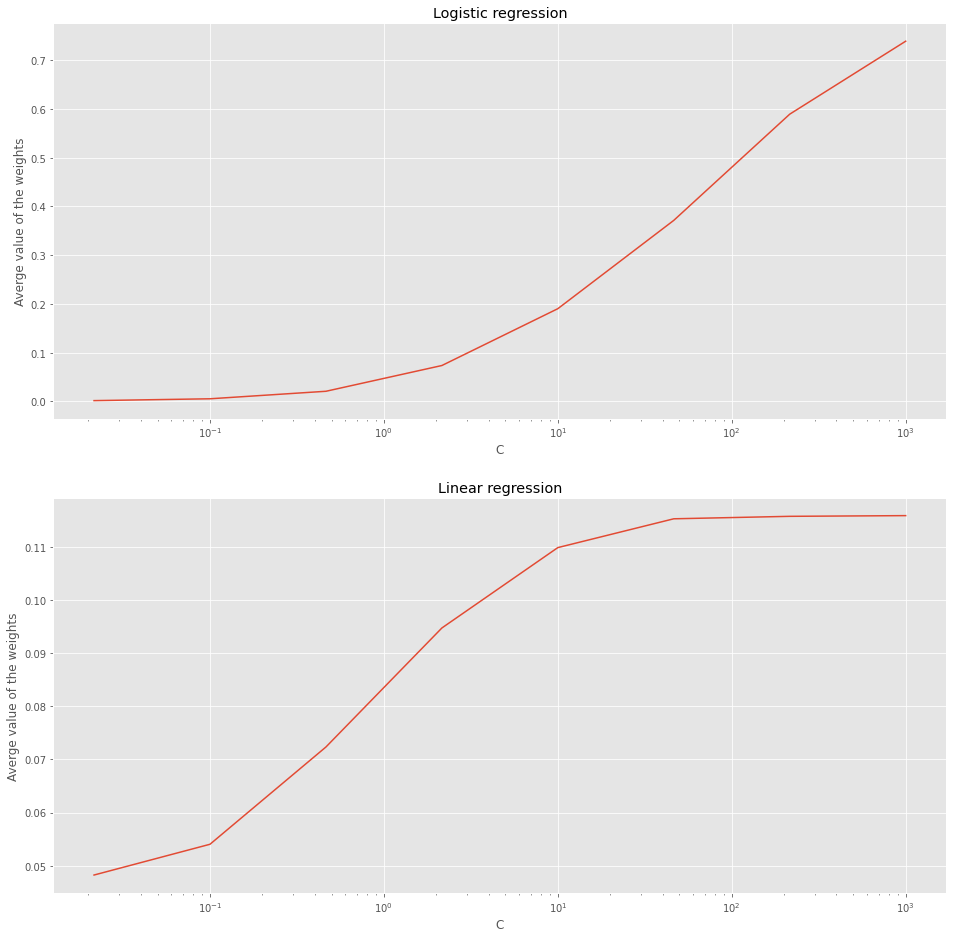

In [14]:
import warnings
warnings.filterwarnings('ignore')

C = np.logspace(3, -3, 10)

fig = plt.figure(figsize=(16, 16))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
ax1.set_title('Logistic regression')
ax1.set_xlabel('C')
ax1.set_xscale('log')
ax1.set_ylabel('Averge value of the weights')
ax2.set_title('Linear regression')
ax2.set_xlabel('C')
ax2.set_ylabel('Averge value of the weights')
params = {'batch_generator' : batch_generator, 'alpha' : 0.01, 'max_epoch' : 10}
log_reg_weights = []
lin_reg_weights = []
for c in C:
    my_log_reg = MySGDClassifier(C=c, model_type='log_reg', **params)
    my_log_reg.fit(X, y, 100)
    my_lin_reg = MySGDClassifier(C=c, model_type='lin_reg', **params)
    my_lin_reg.fit(X, y, 100)
    log_reg_w = np.absolute(my_log_reg.weights).mean()
    lin_reg_w = np.absolute(my_lin_reg.weights).mean()    
    log_reg_weights.append(log_reg_w)
    lin_reg_weights.append(lin_reg_w)
    
ax1.plot(C, log_reg_weights)
ax2.plot(C, lin_reg_weights)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [15]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [16]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [17]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [18]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Выставим большое количество эпох и посмотрим, как меняется время в зависимости от размера батча

In [19]:
my_log_reg = MySGDClassifier(batch_generator, max_epoch=1000, model_type='log_reg')
my_lin_reg = MySGDClassifier(batch_generator, max_epoch=1000, model_type='lin_reg')

In [20]:
%%time
my_log_reg.fit(X_train, y_train, batch_size=1)

CPU times: user 7min 2s, sys: 4.66 s, total: 7min 7s
Wall time: 7min 5s


MySGDClassifier(C=1, alpha=0.01,
                batch_generator=<function batch_generator at 0x7f85042c7840>,
                max_epoch=1000, model_type='log_reg')

In [21]:
%%time
my_log_reg.fit(X_train, y_train, batch_size=1000)

CPU times: user 11.4 s, sys: 7.98 s, total: 19.4 s
Wall time: 5.08 s


MySGDClassifier(C=1, alpha=0.01,
                batch_generator=<function batch_generator at 0x7f85042c7840>,
                max_epoch=1000, model_type='log_reg')

In [22]:
%%time
my_lin_reg.fit(X_train, y_train, batch_size=1000)

CPU times: user 6.02 s, sys: 4.12 s, total: 10.1 s
Wall time: 2.78 s


MySGDClassifier(C=1, alpha=0.01,
                batch_generator=<function batch_generator at 0x7f85042c7840>,
                max_epoch=1000, model_type='lin_reg')

In [23]:
%%time
my_log_reg.fit(X_train, y_train, batch_size=X_train.shape[0])

CPU times: user 8.6 s, sys: 5.54 s, total: 14.1 s
Wall time: 3.67 s


MySGDClassifier(C=1, alpha=0.01,
                batch_generator=<function batch_generator at 0x7f85042c7840>,
                max_epoch=1000, model_type='log_reg')

Размер батча, равный 1000, кажется достаточно оптимальным решением, таким образом будем использовать mini-batch GD

In [24]:
batch_size = 1000

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Разобъем наш тренировочный датасет на тренирочную и валидационную часть.
Для этого выделим все уникальные значения групп, перемешаем и возьмем первые 100 значений id групп;
остальные 29 значений id оставим под валидацию.
Таким образом мы разобъем нашу тренировочную выборку примерно в соотношении 0.775(train) на 0.225(validation).
Далее найдем индексы для разбиения выборки и разобъем ее.

In [25]:
import random

# Для воспроизводимости результата
random.seed(25)

groups_train = groups_train.reshape(-1, 1)
uniq_for_shuffle = np.unique(groups_train)
random.shuffle(uniq_for_shuffle)
train_idx = np.where(groups_train == uniq_for_shuffle[:100])[0]
valid_idx = np.where(groups_train == uniq_for_shuffle[100:])[0]
X_tr = X_train[train_idx, :]
y_tr = y_train[train_idx]
X_val = X_train[valid_idx, :]
y_val = y_train[valid_idx]

In [26]:
X_tr.shape[0]/(X_tr.shape[0] + X_val.shape[0])

0.786142001710864

Нормализуем данные

In [27]:
ss = StandardScaler()
X_tr = ss.fit_transform(X_tr)
X_val = ss.transform(X_val)

In [28]:
params = {'batch_generator' : batch_generator, 'C' : 1}

alpha и max_epoch влияют на скорость сходимости. Поэтому сначала подберем эти два параметра, а после этого коэффициент регуляризации

Понятно, что чем меньше alpha, тем больше итераций нам придется сделать, но при этом и спустимся к решению мы ближе 

Здесь хорошо будет посмотреть на графики функции потерь

CPU times: user 47.3 s, sys: 30.6 s, total: 1min 17s
Wall time: 19.7 s


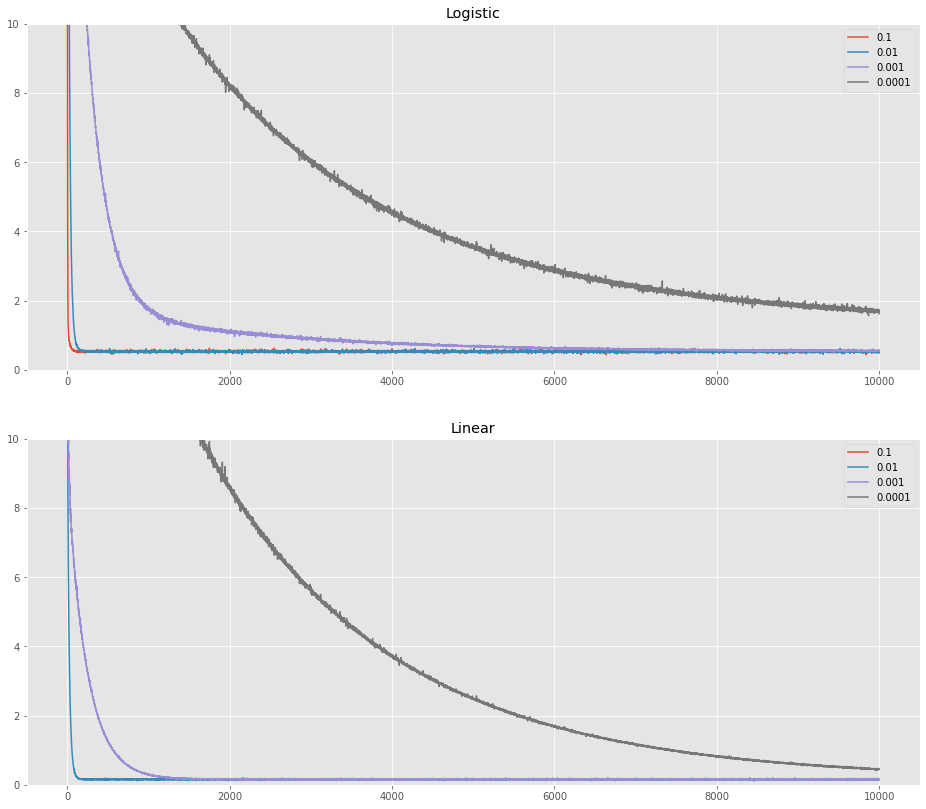

In [29]:
%%time
max_epoch = 1000
alphas = np.logspace(-1, -4, num=4)
fig = plt.figure(figsize=(16, 14))
ax1 = plt.subplot(211)
ax1.set_title('Logistic')
ax1.set_ylim([0, 10])
ax2 = plt.subplot(212)
ax2.set_title('Linear')
ax2.set_ylim([0, 10])

for i, alpha in enumerate(alphas):
    my_log_reg = MySGDClassifier(alpha=alpha, max_epoch=max_epoch, model_type='log_reg', **params)
    my_lin_reg = MySGDClassifier(alpha=alpha, max_epoch=max_epoch, model_type='lin_reg', **params)
    my_log_reg.fit(X_tr, y_tr, batch_size=batch_size)
    my_lin_reg.fit(X_tr, y_tr, batch_size=batch_size)
    ax1.plot(my_log_reg.errors_log['loss'], label=str(alpha))
    ax2.plot(my_lin_reg.errors_log['loss'], label=str(alpha))
    ax1.legend()
    ax2.legend()

По графикам видно, что для 1000 эпох(Приемлемо по времени обучения) оптимальным размером alpha будет 0.005

Теперь подберем параметр C

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
%%time
c_values = np.logspace(0, 4, 100)
params = {'batch_generator' : batch_generator, 'alpha' : 0.005, 'max_epoch' : 1000}

best_log_score = -1
best_lin_score = -1
log_score = []
lin_score = []
for c in c_values:
    my_log_reg = MySGDClassifier(C=c, model_type='log_reg', **params)
    my_log_reg.fit(X_tr, y_tr, batch_size=batch_size)
    y_log_pred = my_log_reg.predict(X_val)
    log_scr = roc_auc_score(y_val, y_log_pred)
    log_score.append(log_scr)
    if log_scr > best_log_score:
        best_log_score = log_scr
        best_log_c = c
        
    my_lin_reg = MySGDClassifier(C=c, model_type='lin_reg', **params)
    my_lin_reg.fit(X_tr, y_tr, batch_size=batch_size)
    y_lin_pred = my_lin_reg.predict(X_val)
    lin_scr = roc_auc_score(y_val, y_lin_pred)
    lin_score.append(lin_scr)
    if lin_scr > best_lin_score:
        best_lin_score = lin_scr
        best_lin_c = c

CPU times: user 24min 33s, sys: 16min 40s, total: 41min 14s
Wall time: 11min 1s


In [34]:
best_log_c, best_lin_c

(126.1856883066021, 2.535364493970112)

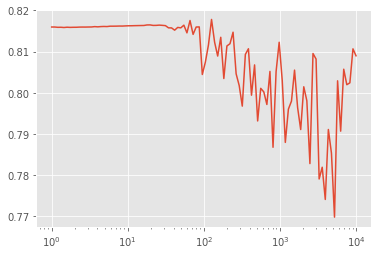

In [39]:
plt.plot(np.logspace(0, 4, 100), log_score)
plt.xscale('log')

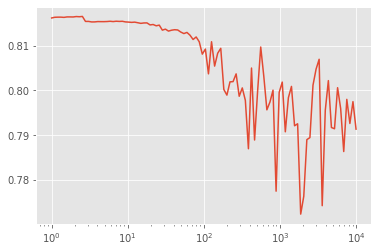

In [40]:
plt.plot(np.logspace(0, 4, 100), lin_score)
plt.xscale('log')

Теперь подберем в более узком диапазоне

Для логистической регрессии:

In [41]:
%%time
c_values = np.linspace(1, 200, 100)
params = {'batch_generator' : batch_generator, 'alpha' : 0.005, 'max_epoch' : 1000}

best_log_score = -1
log_score = []
for c in c_values:
    my_log_reg = MySGDClassifier(C=c, model_type='log_reg', **params)
    my_log_reg.fit(X_tr, y_tr, batch_size=batch_size)
    y_log_pred = my_log_reg.predict(X_val)
    log_scr = roc_auc_score(y_val, y_log_pred)
    log_score.append(log_scr)
    if log_scr > best_log_score:
        best_log_score = log_scr
        best_log_c = c

CPU times: user 17min 3s, sys: 11min 44s, total: 28min 47s
Wall time: 7min 46s


Для линейной регрессии:

In [43]:
%%time
c_values = np.linspace(1, 50, 100)
params = {'batch_generator' : batch_generator, 'alpha' : 0.005, 'max_epoch' : 1000}

best_lin_score = -1
lin_score = []
for c in c_values:
    my_lin_reg = MySGDClassifier(C=c, model_type='lin_reg', **params)
    my_lin_reg.fit(X_tr, y_tr, batch_size=batch_size)
    y_lin_pred = my_lin_reg.predict(X_val)
    lin_scr = roc_auc_score(y_val, y_lin_pred)
    lin_score.append(lin_scr)
    if lin_scr > best_lin_score:
        best_lin_score = lin_scr
        best_lin_c = c

CPU times: user 9min 20s, sys: 6min 3s, total: 15min 24s
Wall time: 3min 55s


In [44]:
best_log_c, best_lin_c

(111.55555555555554, 1.98989898989899)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

Для логистической регрессии:

In [85]:
%%time
params = {'batch_generator' : batch_generator, 'alpha' : 0.005}
my_log_reg = MySGDClassifier(C=best_log_c, model_type='log_reg', max_epoch=2000, **params)
my_log_reg.fit(X_tr, y_tr, batch_size=batch_size)
y_log_pred = my_log_reg.predict(X_val)
borders = np.sort(y_log_pred.ravel())

best_log_score = -1
for border in borders:
    y_pred = np.where(y_log_pred >= border, 1, 0)
    cur_score = f1_score(y_pred, y_val)
    if cur_score > best_log_score:
        best_log_score = cur_score
        best_log_border = border

CPU times: user 22.3 s, sys: 13.6 s, total: 35.9 s
Wall time: 11.7 s


In [86]:
best_log_score, best_log_border

(0.6705202312138728, 0.2750721112671256)

In [87]:
%%time
params = {'batch_generator' : batch_generator, 'alpha' : 0.005}
my_lin_reg = MySGDClassifier(C=best_lin_c, model_type='lin_reg', max_epoch=1000, **params)
my_lin_reg.fit(X_tr, y_tr, batch_size=batch_size)
y_lin_pred = my_lin_reg.predict(X_val)
borders = np.sort(y_lin_pred.ravel())

best_lin_score = -1
for border in borders:
    y_pred = np.where(y_lin_pred >= border, 1, 0)
    cur_score = f1_score(y_pred, y_val)
    if cur_score > best_lin_score:
        best_lin_score = cur_score
        best_lin_border = border

CPU times: user 8.6 s, sys: 3.67 s, total: 12.3 s
Wall time: 5.45 s


In [88]:
best_lin_score, best_lin_border

(0.6674246731097214, 0.2928404807498796)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [89]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [90]:
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [91]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [92]:
params = {'batch_generator' : batch_generator, 'alpha' : 0.005}
my_log_reg = MySGDClassifier(C=best_log_c, model_type='log_reg', max_epoch=1000, **params)
my_log_reg.fit(X_train, y_train, batch_size=batch_size)

MySGDClassifier(C=111.55555555555554, alpha=0.005,
                batch_generator=<function batch_generator at 0x7f85042c7840>,
                max_epoch=1000, model_type='log_reg')

In [93]:
y_test = my_log_reg.predict(X_test)
y_test = np.where(y_test > best_log_border, 1, 0)

In [94]:
len_test = y_test.shape[0]
idx = np.arange(11691, 11691+len_test)
y_test = y_test.reshape(-1, 1)
idx = idx.reshape(-1, 1)
y_test = np.hstack((idx, y_test))

In [95]:
submit = pd.DataFrame(y_test, columns=('pair_id', 'target'))
submit.to_csv('mylogreg.csv', index=False)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***